In [23]:
from pandas import DataFrame
import pandas as pd
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
df = gpd.read_file('data\GeoEPR\GeoEPR-2014\GeoEPR-2014.shp')
df.head()
#dt=pd.read_excel('C:/vidushi/Local Disk/Users/Vidushi/Desktop/3rd year/Project/geoepr_2014')

,gwid,statename,from,to,group,groupid,gwgroupid,umbrella,sqkm,type,geometry
0,2,United States,1946,2013,Whites,1000,201000,NaN,9447198.0,Statewide,(POLYGON ((-155.0055819767222 19.3288821018204...
1,2,United States,1946,2013,American Indians,5000,205000,NaN,2434682.0,Regionally based,(POLYGON ((-80.90276347956785 27.1025992358635...
2,2,United States,1946,2013,African Americans,3000,203000,NaN,1039029.0,Statewide,(POLYGON ((-80.8277909076387 25.16221810725324...
3,2,United States,1966,2013,Asian Americans,4000,204000,NaN,NaN,Urban,None
4,2,United States,1966,2013,Arab Americans,6000,206000,NaN,NaN,Urban,None


In [24]:
df['group'].value_counts()

Roma                                                                 20
Whites/mestizos                                                      15
Russians                                                             14
Serbs                                                                13
Croats                                                               10
Hungarians                                                            9
Arabs                                                                 9
Albanians                                                             9
Ukrainians                                                            7
Uzbeks                                                                7
Indigenous peoples                                                    7
Armenians                                                             6
Byelorussians                                                         6
Berbers                                                         

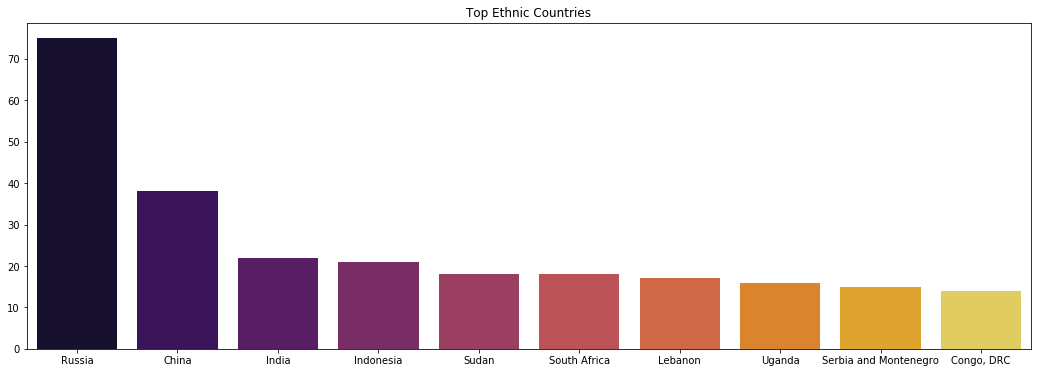

In [26]:
plt.subplots(figsize=(18,6))
sns.barplot(df['statename'].value_counts()[:10].index,df['statename'].value_counts()[:10].values,palette='inferno')
plt.title('Top Ethnic Countries')
plt.show()

In [3]:
df1=df.groupby(['statename']).group.agg(['count'])

In [4]:
df1=df1.sort_values(by='count', ascending=False)
df1=df1.reset_index()
df1

,statename,count
0,Russia,75
1,China,38
2,India,22
3,Indonesia,21
4,Sudan,18
5,South Africa,18
6,Lebanon,17
7,Uganda,16
8,Serbia and Montenegro,15
9,"Congo, DRC",14


In [5]:
df1=df1.rename(index=str, columns={"statename": "country_txt", "count": "count"})

In [6]:
df1

,country_txt,count
0,Russia,75
1,China,38
2,India,22
3,Indonesia,21
4,Sudan,18
5,South Africa,18
6,Lebanon,17
7,Uganda,16
8,Serbia and Montenegro,15
9,"Congo, DRC",14


In [12]:
dt=pd.read_excel("data/GTD/globalterrorismdb_0718dist.xlsx")

In [13]:
dt.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
dt1=dt.groupby(['country_txt'] ,sort= True).size().to_frame('frequency')
#dt1=dt['country_txt'].value_counts().to_dict()
dt1=dt1.sort_values(by='frequency', ascending=False)
dt1=dt1.reset_index()
dt1

,country_txt,frequency
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


In [15]:
dt1['country_txt']

0                                Iraq
1                            Pakistan
2                         Afghanistan
3                               India
4                            Colombia
5                         Philippines
6                                Peru
7                         El Salvador
8                      United Kingdom
9                              Turkey
10                            Somalia
11                            Nigeria
12                           Thailand
13                              Yemen
14                              Spain
15                          Sri Lanka
16                      United States
17                            Algeria
18                             France
19                              Egypt
20                            Lebanon
21                              Chile
22                              Libya
23           West Bank and Gaza Strip
24                              Syria
25                             Russia
26          

In [16]:
result = pd.merge(df1,dt1, how="inner",on=['country_txt'])[:50]
result

,country_txt,count,frequency
0,Russia,75,2194
1,China,38,252
2,India,22,11960
3,Indonesia,21,761
4,Sudan,18,967
5,South Africa,18,2016
6,Lebanon,17,2478
7,Uganda,16,394
8,Namibia,12,151
9,Afghanistan,12,12731


In [17]:
result['count'].corr(result['frequency'])

0.11771197314967619

In [19]:
df1

,country_txt,count
0,Russia,75
1,China,38
2,India,22
3,Indonesia,21
4,Sudan,18
5,South Africa,18
6,Lebanon,17
7,Uganda,16
8,Serbia and Montenegro,15
9,"Congo, DRC",14


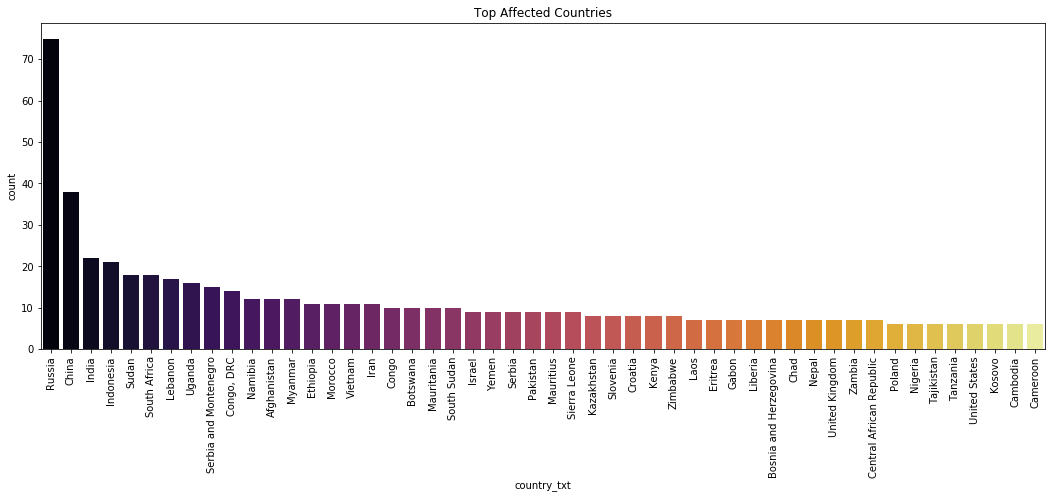

In [20]:
plt.subplots(figsize=(18,6))
sns.barplot(df1['country_txt'][:50],df1['count'][:50],palette='inferno')
plt.title('Top Affected Countries')
plt.xticks(rotation=90)
plt.show()

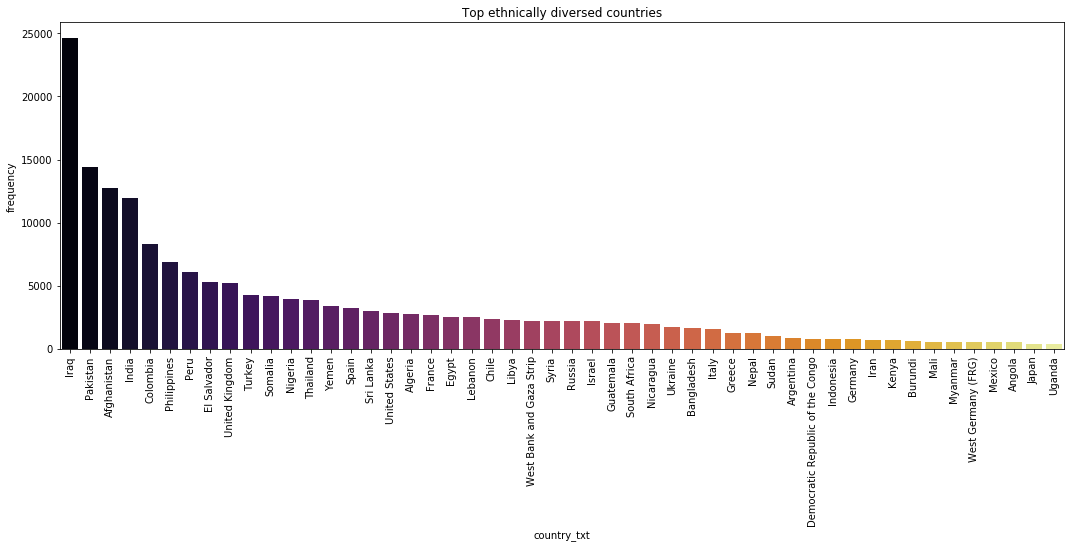

In [21]:
plt.subplots(figsize=(18,6))
sns.barplot(dt1['country_txt'][:50],dt1['frequency'][:50],palette='inferno')
plt.title('Top ethnically diversed countries')
plt.xticks(rotation=90)
plt.show()